### Marine DNA Self Organized Maps

In [100]:
import os
from functools import partial
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set matplotlib settings
%matplotlib inline
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print(python_version())

3.9.15


### Read in  data

In [161]:
Flyer2018_12S_table_counts = pd.read_csv("/Users/skywalker/Documents/GitHub/MarineDNA/Data/Flyer2018_12S_table_counts.tsv", index_col=0, sep='\t')
Flyer2018_12S_table_counts.head(1)

,CN18FESPkoa_SC24,CN18FESPkoa_SC26,CN18FESPkoa_SC29,CN18FESPkoa_SC30,CN18FESPkoa_SC31,CN18FESPkoa_SC32,CN18FESPkoa_SC34,CN18FESPkoa_SC37,CN18FESPkoa_SC40,CN18FESPkoa_SC41,...,CN18Sc09_2_eDNA,CN18Sc10_2_eDNA,CN18Sc14_2_eDNA,CN18Sc14_8_eDNA,CN18Sc15_2_eDNA,CN18Sc15_8_eDNA,CN18Sc18_2_eDNA,CN18Sc18_8_eDNA,CN18Sc27_2_eDNA,CN18Sc27_8_eDNA
ASV ID,,,,,,,,,,,,,,,,,,,,,
ASV_1,24674,26478,58862,20240,26385,30145,47660,38520,43149,32932,...,1798,41,4868,3856,83,12225,63,4799,1350,3087


In [162]:
Flyer2018_16S_table_counts = pd.read_csv("/Users/skywalker/Documents/GitHub/MarineDNA/Data/Flyer2018_16S_table_counts.tsv", index_col=0, sep='\t')
Flyer2018_16S_table_counts.head(1) 

,CN18Fc12_8_eDNA,CN18Fc19_5_eDNA,CN18Fc21_6_eDNA,CN18Fc22_6_eDNA,CN18Fc24_6_eDNA,CN18Fc25_5_eDNA,CN18Fc27_4_eDNA,CN18Fc29_6_eDNA,CN18Fc30_4_eDNA,CN18Fc32_4_eDNA,...,CN18SESPkoa_SC36,CN18SESPkoa_SC37,CN18SESPkoa_SC39,CN18SESPkoa_SC40,CN18SESPkoa_SC41,CN18SESPkoa_SC42,CN18SESPkoa_SC44,CN18SESPkoa_SC45,CN18SESPkoa_SC47,CN18SESPkoa_SC49
ASV ID,,,,,,,,,,,,,,,,,,,,,
495c1bd1608a1dad54d3e2824ce899ef,552,7415,8749,8152,7124,12422,215,8080,8799,2231,...,4324,1339,95,1554,147,2720,21,2015,1847,1886


In [165]:
Flyer2018_18S_table_counts = pd.read_csv("/Users/skywalker/Documents/GitHub/MarineDNA/Data/Flyer2018_18S_table_counts.tsv", index_col=0, sep='\t')
Flyer2018_18S_table_counts.head(1)

,CN18Fc12_8_eDNA,CN18Fc19_5_eDNA,CN18Fc21_6_eDNA,CN18Fc22_6_eDNA,CN18Fc24_6_eDNA,CN18Fc25_5_eDNA,CN18Fc27_4_eDNA,CN18Fc29_6_eDNA,CN18Fc30_4_eDNA,CN18Fc32_4_eDNA,...,CN18SESPkoa_SC36,CN18SESPkoa_SC37,CN18SESPkoa_SC39,CN18SESPkoa_SC40,CN18SESPkoa_SC41,CN18SESPkoa_SC42,CN18SESPkoa_SC44,CN18SESPkoa_SC45,CN18SESPkoa_SC47,CN18SESPkoa_SC49
ASV ID,,,,,,,,,,,,,,,,,,,,,
ASV_1,1,0,3,0,0,3,0,1,7,2,...,7,2,3,2,1,2,1,2,5,4


In [213]:
Flyer2018_COI_table_counts = pd.read_csv("/Users/skywalker/Documents/GitHub/MarineDNA/Data/Flyer2018_COI_table_counts.tsv", index_col=0, sep='\t')
Flyer2018_COI_table_counts.head(100)

,CN18FESPkoa_SC24,CN18FESPkoa_SC26,CN18FESPkoa_SC29,CN18FESPkoa_SC30,CN18FESPkoa_SC31,CN18FESPkoa_SC32,CN18FESPkoa_SC34,CN18FESPkoa_SC37,CN18FESPkoa_SC40,CN18FESPkoa_SC41,...,CN18Sc09_2_eDNA,CN18Sc10_2_eDNA,CN18Sc14_2_eDNA,CN18Sc14_8_eDNA,CN18Sc15_2_eDNA,CN18Sc15_8_eDNA,CN18Sc18_2_eDNA,CN18Sc18_8_eDNA,CN18Sc27_2_eDNA,CN18Sc27_8_eDNA
ASV ID,,,,,,,,,,,,,,,,,,,,,
ASV_3,0,0,0,2,0,0,0,0,0,0,...,0,0,1,0,0,22,0,0,0,0
ASV_10,0,0,0,0,0,0,0,0,0,0,...,198,550,122,499,26,552,8,267,14,1098
ASV_18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_24,0,0,0,4,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
ASV_26,0,0,0,0,0,0,3,3,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_3264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_3283,118,138,78,208,88,148,159,79,56,37,...,0,0,0,0,0,2,0,0,0,0
ASV_3322,0,0,0,0,0,0,0,0,0,0,...,0,16,12,0,0,0,0,0,0,0


#### Counts modeled

In [183]:
Flyer2018_16S_counts_modeled = pd.read_csv("/Users/skywalker/Documents/GitHub/MarineDNA/Data/Flyer2018_16S_counts_modeled.tsv", index_col=0, sep='\t')
Flyer2018_18S_counts_modeled =  pd.read_csv('/Users/skywalker/Documents/GitHub/MarineDNA/Data/Flyer2018_18S_counts_modeled.tsv', index_col=0, sep='\t')
Flyer2018_16S_counts_modeled.head(2)
#Flyer2018_18S_counts_modeled.head(2)

,495c1bd1608a1dad54d3e2824ce899ef,a900b6678ce86851fb16bfafb87f3326,c8e360969108fa2125a3d56eb4dad24f,72143fd9e63fe40c1258948d2f0d79c3,7b6b178fad5599c0e9a734e4fb09fd64,4bbec3bb723375416616a87d785ac74a,0c35cfa523aa27921ef8544a16d1cd36,7ec69f2c62aad60e060e588ef687bdd0,61e9a50f4346bb3a5b16179b8eca71fa,a140195871278e8fcf9447e42bad8786,...,995cc65bcfa53a868c42615004e99ad3,46b90aab075ecd8e4db549da708550d8,c4e1933274329209b7cf24daf18dfe0d,aa9e141a5e2781d280406c513bf34d45,d7682f536589fc5f920533513dd0002b,674933a0d44342a0647f7a5b4591f26e,bebe1b9a7e9aaa78172c1208111f4570,0128431733f67d02efad766d717fe6fd,41102a7dd1f4647ba5477c947daabc0e,51440f89c391fb32f9ee895db22bf8f8
CN18Fc12_8_eDNA,0.078575,0.02631,0.020724,0.021095,0.022934,0.006699,0.000157,0.013179,0.027785,0.014921,...,2.675397e-04,0.000308,0.000390,1.813856e-04,0.000234,0.000076,0.000006,0.000094,0.000236,0.000318
CN18Fc19_5_eDNA,0.168358,0.04374,0.048614,0.042913,0.039488,0.011911,0.005591,0.013227,0.016948,0.021451,...,5.762832e-07,0.000031,0.000023,6.721208e-07,0.000029,0.000002,0.000017,0.000006,0.000010,0.000024


### Read in metadata

In [176]:
Flyer2018_metadata = pd.read_csv("/Users/skywalker/Documents/GitHub/MarineDNA/Data/Flyer2018_metadata.tsv", index_col=0, sep='\t')
Flyer2018_metadata.head(2)

,project_name,vessel,ESP_sample_match,year,season,collection_date,sampling_platform,sampling_device,filtration_device,control_status,...,target_subfragment,F_primer,R_primer,primers_FR,seq_platform,seq_model,seq_chemistry,run_center,run_date,Description
sample_name,,,,,,,,,,,,,,,,,,,,,
CN18Fc12_8_eDNA,eCruises_2018,Flyer,CN18FESPkoa_SC58,2018,Fall,20180907,Flyer,CTD,peristaltic,Exp,...,V4,515F (Parada),806R (Apprill),515F_806R,Illumina,MiSeq,2x150bp PE,Laragen,July_2019,Spring and fall 2018 Flyer cruise and paired E...
CN18Fc19_5_eDNA,eCruises_2018,Flyer,CN18FESPkoa_SC57,2018,Fall,20180908,Flyer,CTD,peristaltic,Exp,...,V4,515F (Parada),806R (Apprill),515F_806R,Illumina,MiSeq,2x150bp PE,Laragen,July_2019,Spring and fall 2018 Flyer cruise and paired E...


In [154]:
RREAS2018_COI_meta_filtered = pd.read_csv("/Users/skywalker/Documents/GitHub/MarineDNA/Data/RREAS2018_COI_meta_filtered.csv", index_col=0)
#RREAS2018_COI_meta_filtered.head(1)

In [155]:
RREAS2018_18S_meta_filtered = pd.read_csv("/Users/skywalker/Documents/GitHub/MarineDNA/Data/RREAS2018_18S_meta_filtered.csv", index_col=0)
#RREAS2018_18S_meta_filtered.head(1)

In [157]:
RREAS2018_12S_meta_filtered = pd.read_csv("/Users/skywalker/Documents/GitHub/MarineDNA/Data/RREAS2018_12S_meta_filtered.csv", index_col=0)
#RREAS2018_12S_meta_filtered.head(1)

### Combine count and metadata

In [177]:
df_18S_Meta = pd.merge(Flyer2018_18S_counts_modeled,Flyer2018_metadata,  left_index=True, right_index=True)
df_18S_Meta.head(1)

,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,ASV_9,ASV_10,...,target_subfragment,F_primer,R_primer,primers_FR,seq_platform,seq_model,seq_chemistry,run_center,run_date,Description
CN18Fc12_8_eDNA,0.000005,0.000029,0.000119,0.000197,0.000377,0.004449,0.013663,0.073634,0.000027,0.001633,...,V4,515F (Parada),806R (Apprill),515F_806R,Illumina,MiSeq,2x150bp PE,Laragen,July_2019,Spring and fall 2018 Flyer cruise and paired E...


In [178]:
df_16S_Meta = pd.merge(Flyer2018_16S_counts_modeled,Flyer2018_metadata,  left_index=True, right_index=True)
df_16S_Meta.head(1)

,495c1bd1608a1dad54d3e2824ce899ef,a900b6678ce86851fb16bfafb87f3326,c8e360969108fa2125a3d56eb4dad24f,72143fd9e63fe40c1258948d2f0d79c3,7b6b178fad5599c0e9a734e4fb09fd64,4bbec3bb723375416616a87d785ac74a,0c35cfa523aa27921ef8544a16d1cd36,7ec69f2c62aad60e060e588ef687bdd0,61e9a50f4346bb3a5b16179b8eca71fa,a140195871278e8fcf9447e42bad8786,...,target_subfragment,F_primer,R_primer,primers_FR,seq_platform,seq_model,seq_chemistry,run_center,run_date,Description
CN18Fc12_8_eDNA,0.078575,0.02631,0.020724,0.021095,0.022934,0.006699,0.000157,0.013179,0.027785,0.014921,...,V4,515F (Parada),806R (Apprill),515F_806R,Illumina,MiSeq,2x150bp PE,Laragen,July_2019,Spring and fall 2018 Flyer cruise and paired E...


#### Subset out just count modeled data

In [185]:
Flyer2018_18S_SOM = df_18S_Meta.iloc[:,:7385]
Flyer2018_18S_SOM.head(1)

,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,ASV_9,ASV_10,...,ASV_12597,ASV_12598,ASV_12599,ASV_12600,ASV_12605,ASV_12614,ASV_12622,ASV_12628,ASV_12632,ASV_12654
CN18Fc12_8_eDNA,0.000005,0.000029,0.000119,0.000197,0.000377,0.004449,0.013663,0.073634,0.000027,0.001633,...,0.000007,0.000069,0.000014,0.00004,0.000064,0.000006,0.000004,0.000003,0.000009,0.000053


In [184]:
Flyer2018_16S_SOM = df_16S_Meta.iloc[:,:2752]
Flyer2018_16S_SOM.head(1)

,495c1bd1608a1dad54d3e2824ce899ef,a900b6678ce86851fb16bfafb87f3326,c8e360969108fa2125a3d56eb4dad24f,72143fd9e63fe40c1258948d2f0d79c3,7b6b178fad5599c0e9a734e4fb09fd64,4bbec3bb723375416616a87d785ac74a,0c35cfa523aa27921ef8544a16d1cd36,7ec69f2c62aad60e060e588ef687bdd0,61e9a50f4346bb3a5b16179b8eca71fa,a140195871278e8fcf9447e42bad8786,...,995cc65bcfa53a868c42615004e99ad3,46b90aab075ecd8e4db549da708550d8,c4e1933274329209b7cf24daf18dfe0d,aa9e141a5e2781d280406c513bf34d45,d7682f536589fc5f920533513dd0002b,674933a0d44342a0647f7a5b4591f26e,bebe1b9a7e9aaa78172c1208111f4570,0128431733f67d02efad766d717fe6fd,41102a7dd1f4647ba5477c947daabc0e,51440f89c391fb32f9ee895db22bf8f8
CN18Fc12_8_eDNA,0.078575,0.02631,0.020724,0.021095,0.022934,0.006699,0.000157,0.013179,0.027785,0.014921,...,0.000268,0.000308,0.00039,0.000181,0.000234,0.000076,0.000006,0.000094,0.000236,0.000318


In [186]:
from minisom import MiniSom
import numpy as np
import pandas as pd

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 77.30910609821632


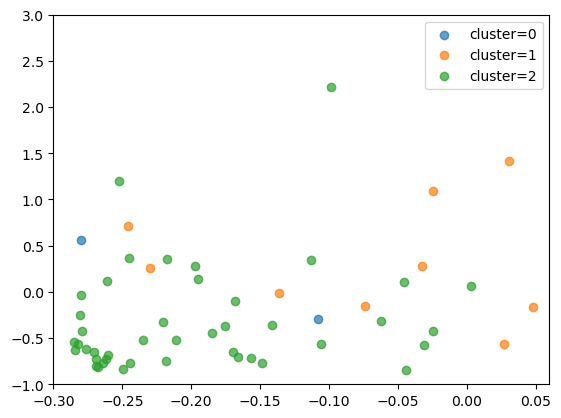

In [208]:
data = Flyer2018_18S_SOM
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
#for centroid in som.get_weights():
#    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
#                s=80, linewidths=35, color='k', label='centroid')
plt.xlim(-0.3, 0.06)
plt.ylim(-1, 3)
plt.legend();

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 41.62526982913708


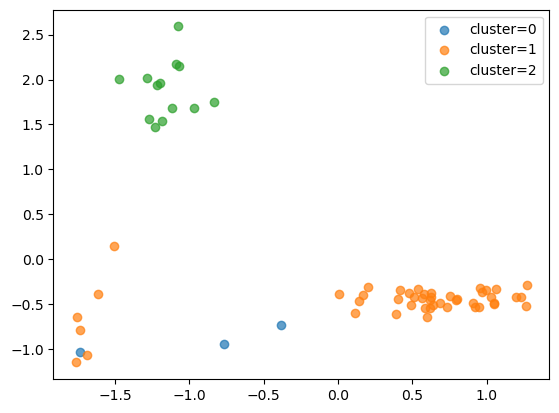

In [209]:
data = Flyer2018_16S_SOM
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)


# plotting centroids
#for centroid in som.get_weights():
#    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
#                s=80, linewidths=35, color='k', label='centroid')
#plt.xlim(-0.3, 0.06)
#plt.ylim(-1, 3)
plt.legend();

In [ ]:
data = Flyer2018_16S_SOM
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)


# plotting centroids
#for centroid in som.get_weights():
#    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
#                s=80, linewidths=35, color='k', label='centroid')
#plt.xlim(-0.3, 0.06)
#plt.ylim(-1, 3)
plt.legend();